# EDA and Cleaning of Diabetics Data

- First Step to load data frame
- Second Step to create Dictionary to converge into one dataset. This will make reading the inital dataset a little easier. 

In [54]:
# Libraries to load
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# data visualization packages 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
pd.set_option('max_columns', None)
import pandas_profiling

# SMOTE package to address imbalanced classes 
from imblearn.over_sampling import SMOTE 

from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(123)

In [55]:
# Load DF
df = pd.read_csv('./data/diabetic_data.csv', na_values='?')

In [56]:
# Shape of dataframe
df.shape

(101766, 50)

In [57]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [58]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# Cleaning - Missingness

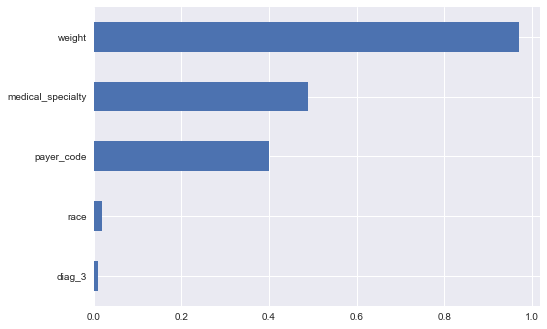

In [59]:
# Compute missingness 
missing = round((df.isna().sum()/len(df)),2).sort_values(ascending = True)
missing = missing[missing > 0]
missing.plot(kind='barh')

In [60]:
# Missing values table 
missing_table = pd.DataFrame(data=missing)
missing_table

,0
diag_3,0.01
race,0.02
payer_code,0.40
medical_specialty,0.49
weight,0.97


In [61]:
# Create target column
#Set all values <30 to YES (Readmission), else all other values to NO
df.readmitted = df.readmitted.apply(lambda x: 'Yes' if x in ['<30'] else 'No')

In [62]:
# Drop columns for missingness
df = df.drop(columns="weight")
df = df.drop(columns="payer_code")
df = df.drop(columns="medical_specialty")

In [63]:
# Only 3 values of unknown gender; drop those observations
df = df[df.gender != "Unknown/Invalid"]

In [64]:
# Dealing with Missingness
df = df.replace("?",np.NaN)
df.race = df.race.replace(np.NaN,"unknown")
df = df.replace(np.NaN, "missing")

In [65]:
df.isna().sum().sum()

0

In [66]:
# Ensuring correct type of variables
df.admission_type_id = df.admission_type_id.apply(str)
df.discharge_disposition_id = df.discharge_disposition_id.apply(str)
df.admission_source_id = df.admission_source_id.apply(str)

# Cleaning - Delete Multiple Encounters

In [67]:
# Drop duplicate values for patient number. Keep first entry to show if patient was readmitted or not. 
df = df.drop_duplicates('patient_nbr', keep = 'first')
df = df.drop(columns="encounter_id")
df = df.drop(columns="patient_nbr")
df.shape

(71515, 45)

In [68]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,missing,missing,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,50,2,33,0,0,0,574,574,250.02,9,None,>7,No,No,No,No,No,No,No,Up,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,No
101755,Other,Female,[40-50),1,1,7,14,73,6,26,0,1,0,592,599,518,9,None,>8,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No
101756,Other,Female,[60-70),1,1,7,2,46,6,17,1,1,1,996,585,403,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,No
101758,Caucasian,Female,[80-90),1,1,7,5,76,1,22,0,1,0,292,8,304,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,No


# Cleaning - Feature Simplification

In [69]:
# Create a function to group diagnostic codes by range as well as separating diabetes specifically

def diag_grouper(series):
    
    '''takes input as df.col and outputs diagnostic code groupings'''
    
    def no_str(x):
        
        '''takes input as an element of a series and pulls code for diabetes specific disease and E/V categories'''
        
        if '250' in x: return '9999'
        elif 'E' in x: return '123456'
        elif 'V' in x: return '123456'
        elif x == 'missing': return '-654321'
        else: return x
    
    series = series.apply(no_str)
    
    series = series.astype(float)
    
    def num_categ(x):
        
        '''takes input as an element of a series and saves each range as a numerical placeholder'''
        
        if 1 <= x <= 139: return 10000
        elif 140 <= x <= 239: return 10001
        elif 240 <= x <= 279: return 10002
        elif 280 <= x <= 289: return 10003
        elif 290 <= x <= 319: return 10004
        elif 320 <= x <= 389: return 10005
        elif 390 <= x <= 459: return 10006
        elif 460 <= x <= 519: return 10007
        elif 520 <= x <= 579: return 10008
        elif 580 <= x <= 629: return 10009
        elif 630 <= x <= 679: return 10010
        elif 680 <= x <= 709: return 10011
        elif 710 <= x <= 739: return 10012
        elif 740 <= x <= 759: return 10013
        elif 760 <= x <= 779: return 10014
        elif 780 <= x <= 799: return 10015
        elif 800 <= x <= 999: return 10016
        else: return x
        
    series = series.apply(num_categ)
    
    def text_convert(x):
        
        '''takes input as an element of a series and converts each placeholder to string format'''
        
        if x == 10000: return "Infectious and Parasitic Disease"
        elif x == 10001: return "Neoplasms"
        elif x == 10002: return "Endocrine/Metabolic/Immunity Disorder"
        elif x == 10003: return "Blood/Blood Forming Organ Disease"
        elif x == 10004: return "Mental Disorder"
        elif x == 10005: return "Nervous System/Sense Organ Disease"
        elif x == 10006: return "Circulatory Disease"
        elif x == 10007: return "Respiratory Disease"
        elif x == 10008: return "Digestive Disease"
        elif x == 10009: return "Genitourinary Disease"
        elif x == 10010: return "Complications of Pregnancy/Childbirth/Puerperium"
        elif x == 10011: return "Skin Disease"
        elif x == 10012: return "Musculoskeletal/Connective Tissue Disease"
        elif x == 10013: return "Congenital Anomalies"
        elif x == 10014: return "Conditions of Perinatal Origin"
        elif x == 10015: return "Symptoms/Signs/Ill-Defined Conditions"
        elif x == 10016: return "Injury and Poisoning"
        elif x == 9999: return "Diabetes"
        elif x == 123456: return "External Injury/Supplemental"
        elif x == -654321: return "Missing"
    
    return series.apply(text_convert)

In [70]:
# Apply diag_grouper to the data frame
df.diag_1 = diag_grouper(df.diag_1)
df.diag_2 = diag_grouper(df.diag_2)
df.diag_3 = diag_grouper(df.diag_3)

# Perform an 80/20 Split for Hold Out Data

In [71]:
# Perform and 80/20 split of the data
train, test = train_test_split(df, test_size=0.2)

# Plots and Deeper EDA (Training Data Only)

In [72]:
#train.profile_report() - caution greatly increases file size

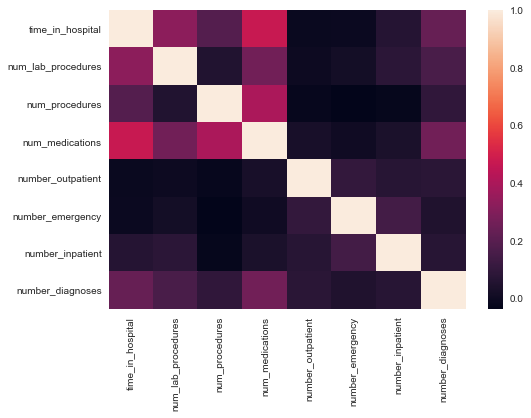

In [73]:
# Looking at correlation - keep an eye out for time_in_hospital vs num_medications
corr = train.corr()
sns.heatmap(corr)

## Write CSV's 

In [74]:
#Main DF
df.to_csv(r'./data/cleaned_df.csv', index = False)

In [75]:
#Test DF
test.to_csv(r'./data/test_df.csv', index = False)

In [76]:
#Train DF
train.to_csv(r'./data/train_df.csv', index = False)

# Plots

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

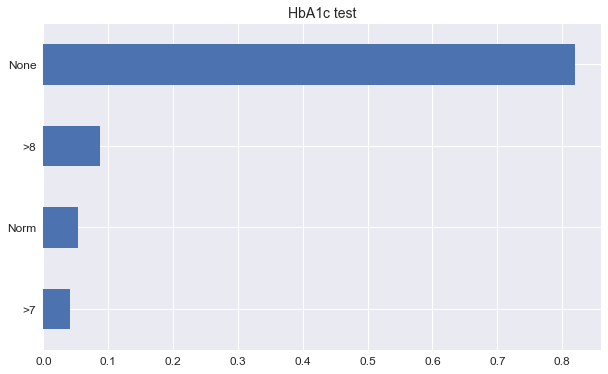

In [77]:
# HbA1c plot
plt.figure(figsize=(10,6))
a1cr_plot = train.A1Cresult.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('HbA1c test',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

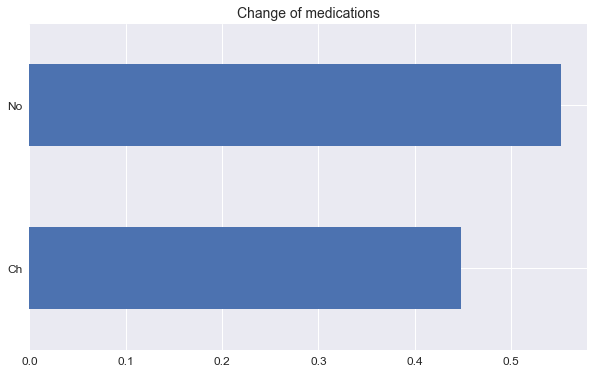

In [78]:
# Med change plot
plt.figure(figsize=(10,6))
change_plot = train.change.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Change of medications',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

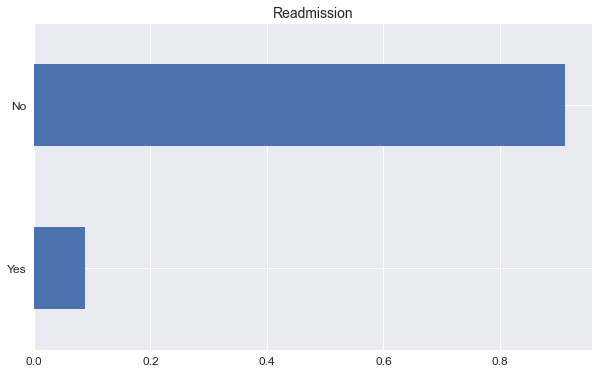

In [79]:
# Readmission plot
plt.figure(figsize=(10,6))
readmission_plot = train.readmitted.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Readmission',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

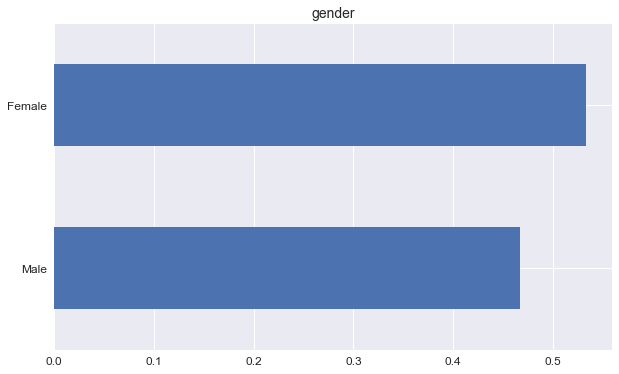

In [80]:
# Gender plot
plt.figure(figsize=(10,6))
gender_plot = train.gender.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('gender',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

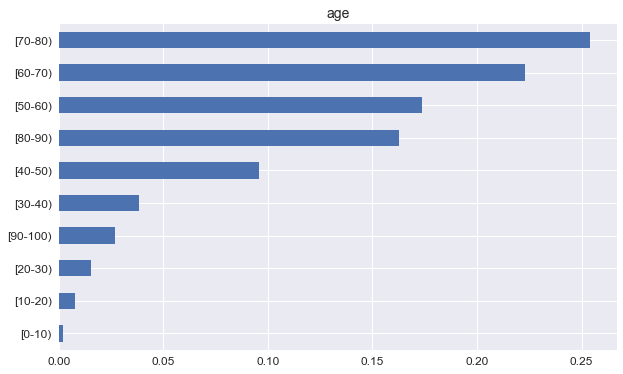

In [81]:
# age plot
plt.figure(figsize=(10,6))
age_plot = train.age.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('age',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

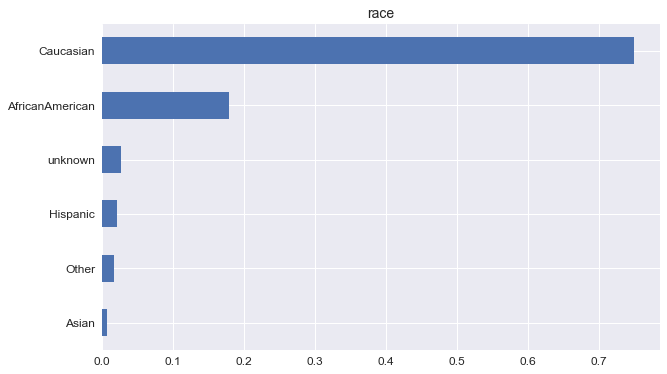

In [82]:
# Race plot
plt.figure(figsize=(10,6))
race_plot = train.race.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('race',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [83]:
train['max_glu_serum'].replace('>300','>200',inplace=True)
train['A1Cresult'].replace('>8','>7',inplace=True)

In [84]:
#Readmission Table 1: Max Glucouse Serum
train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count()

race
max_glu_serum readmitted       
>200          No           1232
              Yes           144
None          No          49693
              Yes          4749
Norm          No           1259
              Yes           135

In [85]:
#Percentage
train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count().apply(lambda x: x/train.race.count())

race
max_glu_serum readmitted          
>200          No          0.021534
              Yes         0.002517
None          No          0.868577
              Yes         0.083007
Norm          No          0.022006
              Yes         0.002360

## A1c 

In [86]:
#Readmission Table 2: A1C Result 
train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count()

race
A1Cresult readmitted       
>7        No           6700
          Yes           603
None      No          42720
          Yes          4170
Norm      No           2764
          Yes           255

In [87]:
#Percentage 
train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count().apply(lambda x: x/train.race.count())

race
A1Cresult readmitted          
>7        No          0.117108
          Yes         0.010540
None      No          0.746696
          Yes         0.072887
Norm      No          0.048312
          Yes         0.004457

## Gender

In [88]:
#Readmission Table 3: Gender
train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count()

race
gender readmitted       
Female No          27789
       Yes          2697
Male   No          24395
       Yes          2331

In [89]:
#Percentage 
train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count().apply(lambda x: x/train.race.count())

race
gender readmitted          
Female No          0.485720
       Yes         0.047140
Male   No          0.426397
       Yes         0.040743

## Age

In [90]:
#Readmission Table 4: Age
train[['age','readmitted', 'race']].groupby(['age','readmitted']).count()

race
age      readmitted       
[0-10)   No            124
         Yes             3
[10-20)  No            416
         Yes            20
[20-30)  No            818
         Yes            70
[30-40)  No           2041
         Yes           143
[40-50)  No           5081
         Yes           405
[50-60)  No           9250
         Yes           691
[60-70)  No          11623
         Yes          1130
[70-80)  No          13073
         Yes          1464
[80-90)  No           8356
         Yes           962
[90-100) No           1402
         Yes           140

In [91]:
#Percentage
train[['age','readmitted', 'race']].groupby(['age','readmitted']).count().apply(lambda x: x/train.race.count())

race
age      readmitted          
[0-10)   No          0.002167
         Yes         0.000052
[10-20)  No          0.007271
         Yes         0.000350
[20-30)  No          0.014298
         Yes         0.001224
[30-40)  No          0.035674
         Yes         0.002499
[40-50)  No          0.088810
         Yes         0.007079
[50-60)  No          0.161679
         Yes         0.012078
[60-70)  No          0.203157
         Yes         0.019751
[70-80)  No          0.228501
         Yes         0.025589
[80-90)  No          0.146053
         Yes         0.016815
[90-100) No          0.024505
         Yes         0.002447

### Race

In [92]:
#Readmission Table 5: Race
train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count()

gender
race            readmitted        
AfricanAmerican No            9407
                Yes            852
Asian           No             356
                Yes             30
Caucasian       No           38959
                Yes           3874
Hispanic        No            1135
                Yes             98
Other           No             881
                Yes             62
unknown         No            1446
                Yes            112

In [93]:
#Percentage
train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count().apply(lambda x: x/train.gender.count())

gender
race            readmitted          
AfricanAmerican No          0.164424
                Yes         0.014892
Asian           No          0.006222
                Yes         0.000524
Caucasian       No          0.680959
                Yes         0.067713
Hispanic        No          0.019838
                Yes         0.001713
Other           No          0.015399
                Yes         0.001084
unknown         No          0.025274
                Yes         0.001958

In [95]:
#train.profile_report()